In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('analitica.csv',sep=";")

In [3]:
df.head(3)

,Статус оповещения,Перегон,Продолжительность,Признак вины сторонней организации,Признак вины сервисной организации,Предприятие сторон. организаций,Предприятие сервис. организаций,Серия отказавшего локомотива,Бортовой номер отказавшего локомотива,Категория отказа,...,ОТС 3 уровня,ID отказа,Начало отказа,Группа причин,ОТС 2 уровня,Вид следования отказавшего локомотива,теп / эле,месяц,дат,ден
0,расследован,ГАТЧИНА-Т-БАЛТ,76,нет,есть,NaN,NaN,ВЛ10,1359.0,3 категория,...,Коллектор тягового двигателя постоянного тока,11608516,02.01.2021 19:23,Неисправность коллектора тягового двигателя по...,Тяговый двигатель постоянного тока,грузовое,электровозы,1,02.01.2021,2
1,расследован,НОВОЛИСИНО,145,нет,есть,NaN,NaN,ВЛ10У,664.0,1 категория,...,Щеточный аппарат электродвигателя постоянного ...,11608609,03.01.2021 02:05,Неисправность щеточного аппарата электродвигат...,Электродвигатель постоянного тока,грузовое,электровозы,1,03.01.2021,3
2,расследован,ГУЗЯТИНО,78,нет,есть,NaN,NaN,2ТЭ116У,114.0,1 категория,...,Провода кабели силовых цепей,11608729,03.01.2021 05:07,Неисправность проводов кабелей силовых цепей,Провода кабели силовых цепей,грузовое,тепловозы,1,03.01.2021,3


### приведение к нижнему регистру

In [4]:
df.columns = df.columns.str.replace(' ','_').str.lower()

In [5]:
df = df[df['статус_оповещения']=='расследован']

In [6]:
df.describe()

,продолжительность,бортовой_номер_отказавшего_локомотива,id_отказа,месяц,ден
count,2064.000000,2046.000000,2.064000e+03,2064.000000,2064.000000
mean,70.052810,764.433529,1.176170e+07,3.971415,15.961240
std,111.379751,1349.990496,9.732708e+04,2.072523,8.373402
min,1.000000,1.000000,1.160852e+07,1.000000,1.000000
25%,14.000000,47.000000,1.167678e+07,2.000000,9.000000
50%,28.000000,295.000000,1.175164e+07,4.000000,16.000000
75%,80.000000,936.250000,1.185686e+07,6.000000,23.000000
max,1440.000000,9106.000000,1.192322e+07,7.000000,31.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2064 entries, 0 to 2063
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   статус_оповещения                      2064 non-null   object 
 1   перегон                                2064 non-null   object 
 2   продолжительность                      2064 non-null   int64  
 3   признак_вины_сторонней_организации     2064 non-null   object 
 4   признак_вины_сервисной_организации     2064 non-null   object 
 5   предприятие_сторон._организаций        477 non-null    object 
 6   предприятие_сервис._организаций        1 non-null      object 
 7   серия_отказавшего_локомотива           2064 non-null   object 
 8   бортовой_номер_отказавшего_локомотива  2046 non-null   float64
 9   категория_отказа                       2064 non-null   object 
 10  отс_1_уровня                           2064 non-null   object 
 11  отс_

In [8]:
df.isnull().sum()

статус_оповещения                           0
перегон                                     0
продолжительность                           0
признак_вины_сторонней_организации          0
признак_вины_сервисной_организации          0
предприятие_сторон._организаций          1587
предприятие_сервис._организаций          2063
серия_отказавшего_локомотива                0
бортовой_номер_отказавшего_локомотива      18
категория_отказа                            0
отс_1_уровня                                0
отс_3_уровня                                0
id_отказа                                   0
начало_отказа                               0
группа_причин                               1
отс_2_уровня                                0
вид_следования_отказавшего_локомотива       0
теп_/_эле                                   0
месяц                                       0
дат                                         0
ден                                         0
dtype: int64

### Переводим дату в формат дата

In [9]:
df['дата']=df['начало_отказа'].str[:10]
df['mounth'] = df['начало_отказа'].str[3:5]

#создаем колонку месяц
month_dict = {'01':'январь','02':'февраль', '03':'март', '04':'апрель', '05':'май', '06':'июнь', '07':'июль', '08':'август', '09':'сентябрь', '10':'октябрь', '11':'ноябрь', '12':'декабрь'}
df['month_mes'] = df['mounth'].map(month_dict)

df['дата']=df['дата'].astype(str)
df['дата'] = pd.to_datetime(df['дата'],dayfirst=True)

In [10]:
df['начало_отказа'] = df['начало_отказа'].astype(str)
df['начало_отказа'] = pd.to_datetime(df['начало_отказа'],dayfirst=True)

### создаем колонку тепловозы - электровозы


In [11]:
k = ['ВЛ10', 'ВЛ10У', '3ЭС4К', '2ЭС5К', '2ЭС4К', '2ЭС7', 'ВЛ15С', 'ЭП1',
       'ЧС200', 'ВЛ15', '3ЭС5К', 'ВЛ80С', 'ЭП20', 'ЭП2К', '2ЭС6', 'ВЛ80Т',
       'ЧС2Т']

In [12]:
df['el tep'] = df['серия_отказавшего_локомотива'].apply(lambda x: x in k)
df['el tep'].replace(True,'электровозы',inplace=True)
df['el tep'].replace(False,'тепловозы',inplace=True)

In [13]:
df['серия_отказавшего_локомотива'].unique()

array(['ВЛ10', 'ВЛ10У', '2ТЭ116У', 'ТЭП70', '2ТЭ116', '2ТЭ25КМ', '3ЭС4К',
       '2ЭС5К', '2М62', 'ТЭМ18ДМ', '2ЭС4К', '2ЭС7', 'ВЛ15С', 'ЭП1',
       '2ТЭ116К', 'ДМ62', 'М62', 'ЧС200', 'ВЛ15', 'ТЭМ2', 'ТЭМ18В',
       '3ЭС5К', 'ВЛ80С', '3М62У', 'ТЭП70БС', 'ТЭМ7А', 'ЭП20', 'ЧМЭ3',
       'ЭП2К', '2М62У', 'ТЭМ18Д', 'ЧМЭ3Т', 'ЧМЭ3Э', '2ЭС6', '2ТЭ116УД',
       'ТЭМ2У', 'ВЛ80Т', 'ТГМ6А', '3М62', 'ТЭМ7', 'ТГМ4', 'ЧС2Т',
       'ТЭМ2УМ'], dtype=object)

In [14]:
#удаление ненужных строк с ненужными сериями
df.drop(df[(df['серия_отказавшего_локомотива']=='ВЛ80С') | (df['серия_отказавшего_локомотива']=='ЭП20') | (df['серия_отказавшего_локомотива']=='ВЛ80Т') | (df['серия_отказавшего_локомотива']=='2ТЭ116УД')].index, inplace=True)

In [15]:
#удаление ненужных столбцов
df=df.drop(columns=["предприятие_сторон._организаций","предприятие_сервис._организаций","id_отказа"],axis=1)

In [16]:
df[df.isnull().any(axis=1)]

,статус_оповещения,перегон,продолжительность,признак_вины_сторонней_организации,признак_вины_сервисной_организации,серия_отказавшего_локомотива,бортовой_номер_отказавшего_локомотива,категория_отказа,отс_1_уровня,отс_3_уровня,...,отс_2_уровня,вид_следования_отказавшего_локомотива,теп_/_эле,месяц,дат,ден,дата,mounth,month_mes,el tep
49,расследован,ШОССЕЙНАЯ-АЛЕКСАНДРОВСКАЯ,3,нет,нет,М62,NaN,3 категория,Электрооборудование силовой цепи вспомогатель...,Аккумуляторная батарея,...,Аккумулятор,передаточно-вывозное,тепловозы,1,09.01.2021,9,2021-01-09,01,январь,тепловозы
307,расследован,СПБ-СОРТ-МОСК,12,нет,нет,3ЭС4К,NaN,3 категория,Электрооборудование силовой цепи вспомогатель...,Контактный мостик кнопки,...,Кнопка,грузовое,электровозы,2,02.02.2021,2,2021-02-02,02,февраль,электровозы
528,расследован,СПБ-СОРТ-МОСК,14,нет,нет,3ЭС4К,NaN,3 категория,Приборы безопасности и радиосвязь локомотива ...,Радиостанция РВС-1,...,Радиосвязь на локомотиве МВПС,грузовое,электровозы,2,21.02.2021,21,2021-02-21,02,февраль,электровозы
710,расследован,ВЕРЕВО,14,нет,есть,2ТЭ116У,NaN,3 категория,Дизель и дизельное оборудование локомотива МВПС,Трубка высокого давления топливного насоса выс...,...,Топливный насос высокого давления,грузовое,тепловозы,3,10.03.2021,10,2021-03-10,03,март,тепловозы
847,расследован,МГА-НАЗИЯ,44,нет,есть,ВЛ15,NaN,2 категория,Экипажная часть и механическое оборудование ло...,Стакан буксового узла локомотива МВПС,...,Буксовый узел локомотива МВПС,грузовое,электровозы,3,23.03.2021,23,2021-03-23,03,март,электровозы
1095,расследован,СУОЯРВИ I-ВЕРККО,79,нет,есть,3М62У,NaN,1 категория,Электрооборудование силовой цепи вспомогатель...,Провода кабели силовых цепей,...,Провода кабели силовых цепей,грузовое,тепловозы,4,18.04.2021,18,2021-04-18,04,апрель,тепловозы
1159,расследован,БАБАЕВО,58,нет,есть,2ЭС4К,31.0,2 категория,Приборы безопасности и радиосвязь локомотива ...,Блок индикации БИЛ-У комплексного локомотивног...,...,Комплексное локомотивное устройство безопаснос...,грузовое,электровозы,4,25.04.2021,25,2021-04-25,04,апрель,электровозы
1325,расследован,БАБАЕВО,14,нет,нет,2ЭС6,NaN,3 категория,Электрооборудование силовой цепи вспомогатель...,Провода кабели силовых цепей,...,Провода кабели силовых цепей,грузовое,электровозы,5,16.05.2021,16,2021-05-16,05,май,электровозы
1400,расследован,СПБ-СОРТ-МОСК,5,есть,нет,3ЭС4К,NaN,3 категория,Электрооборудование силовой цепи вспомогатель...,Контактная система автоматического выключателя,...,Автоматический выключатель,грузовое,электровозы,5,25.05.2021,25,2021-05-25,05,май,электровозы
1418,расследован,СПБ-СОРТ-МОСК,14,есть,нет,3ЭС4К,NaN,3 категория,Тормозное и пневматическое оборудование локомо...,Пневматический тормоз (ДОСС),...,Пневматический тормоз (ДОСС),грузовое,электровозы,5,26.05.2021,26,2021-05-26,05,май,электровозы


In [17]:
#удаление строк с nan 
df = df.drop(df.loc[df['бортовой_номер_отказавшего_локомотива'].isna(),:].index)

In [18]:
#удаление строк с nan 
df = df.drop(df.loc[df['группа_причин'].isna(),:].index)

In [19]:
df.isnull().sum()

статус_оповещения                        0
перегон                                  0
продолжительность                        0
признак_вины_сторонней_организации       0
признак_вины_сервисной_организации       0
серия_отказавшего_локомотива             0
бортовой_номер_отказавшего_локомотива    0
категория_отказа                         0
отс_1_уровня                             0
отс_3_уровня                             0
начало_отказа                            0
группа_причин                            0
отс_2_уровня                             0
вид_следования_отказавшего_локомотива    0
теп_/_эле                                0
месяц                                    0
дат                                      0
ден                                      0
дата                                     0
mounth                                   0
month_mes                                0
el tep                                   0
dtype: int64

# Проводим анализ

## Общие данные

In [62]:
# df['el tep'].value_counts()

электровозы    1153
тепловозы       873
Name: el tep, dtype: int64

In [65]:
df['el tep'].value_counts(normalize=True)

электровозы    0.569102
тепловозы      0.430898
Name: el tep, dtype: float64

In [22]:
# df['категория_отказа'].value_counts().sort_index()

In [23]:
el = len(df[df['el tep']=='электровозы'])
tep = len(df[df['el tep']=='тепловозы'])
summ = el + tep
el_pr = int(100 * el/summ)
tep_pr = int(100 * tep/summ)
kat_1 = len(df[df['категория_отказа']=='1 категория'])
kat_2 = len(df[df['категория_отказа']=='2 категория'])
kat_3 = len(df[df['категория_отказа']=='3 категория'])
print(f"За рассматриваемый период по локомотивам Октябрьской дирекции тяги было допущено {summ} случая(ев) отказа всех категорий. С электровозным парком допущено {el} случаев отказа всех категорий (что составляет {el_pr}% от общего количества), с тепловозным парком допущено {tep} случаев отказа всех категорий (что составляет {tep_pr}% от общего количества)")
print(f"    1 категории было допущено {kat_1} случая отказа")
print(f"    2 категории было допущено {kat_2} случая отказа")
print(f"    3 категории было допущено {kat_3} случая отказа")
print("На графике ниже показано распределение отказов всех категорий по виду тяги и распределение отказов по категориям")

За рассматриваемый период по локомотивам Октябрьской дирекции тяги было допущено 2026 случая(ев) отказа всех категорий. С электровозным парком допущено 1153 случаев отказа всех категорий (что составляет 56% от общего количества), с тепловозным парком допущено 873 случаев отказа всех категорий (что составляет 43% от общего количества)
    1 категории было допущено 625 случая отказа
    2 категории было допущено 451 случая отказа
    3 категории было допущено 950 случая отказа
На графике ниже показано распределение отказов всех категорий по виду тяги и распределение отказов по категориям


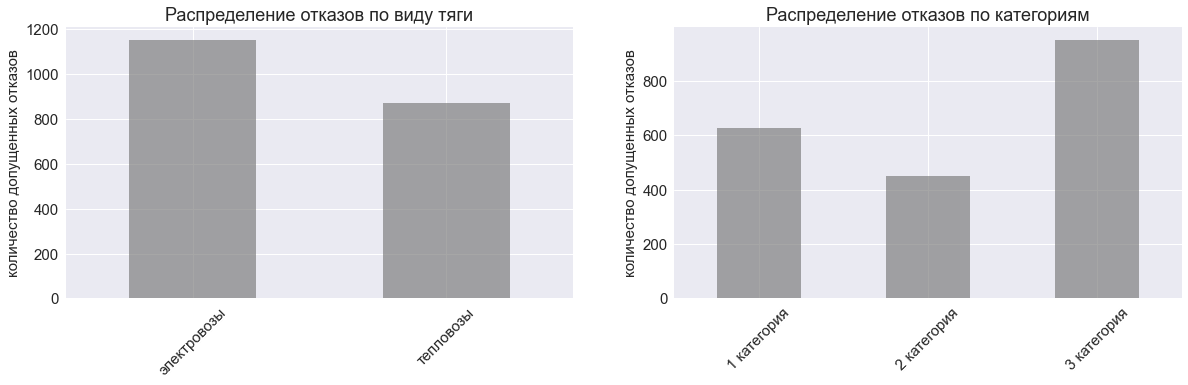

электровозы    1153
тепловозы       873
Name: el tep, dtype: int64

In [68]:
plt.style.use('seaborn')
fig, axes = plt.subplots(1,2, figsize=(20,5))
df_1 = df['el tep'].value_counts().plot.bar(ax=axes[0],fontsize=15, rot=45, color = "gray", alpha = 0.7)
df_2 = df['категория_отказа'].value_counts().sort_index().plot.bar(ax=axes[1],fontsize=15,rot=45,color = "grey",alpha = 0.7)

axes[0].set_title('Распределение отказов по виду тяги', fontsize=18)
axes[1].set_title('Распределение отказов по категориям', fontsize=18)
axes[0].set_ylabel('количество допущенных отказов', fontsize=15)
axes[1].set_ylabel('количество допущенных отказов', fontsize=15)

# axes[0].legend(handles=1)
# axes[1].legend(loc = 1)

plt.show()
df['el tep'].value_counts()

In [71]:
int(100*df['el tep'].value_counts(normalize=True)[1])

43

In [25]:
# df['el tep'].value_counts().plot(kind="bar")
# df['el tep'].value_counts()
# plt.show()

In [26]:
# f, ax = plt.subplots(figsize=(5, 5))
# plt.xticks(rotation='0')
# sns.barplot(x = df['el tep'], y=df.index)
# plt.xlabel('вид тяги', fontsize=10)
# plt.ylabel('количество допущенных отказов', fontsize=10)
# plt.show()

### по категории отказа 

In [27]:
# fig, axes = plt.subplots(1,1, figsize=(10,3))
# df['категория_отказа'].value_counts().sort_index().plot.bar()
# plt.show()

### динамика отказов по месяцам

In [28]:
df['mounth']= pd.to_numeric(df['mounth'], downcast='signed')

In [29]:
number_mean = int(df['mounth'].value_counts().median()) #среднее значение за 7 месяцев
mounth_max = int(df['mounth'].max()) #максимальный месяц - последний
df_mounth_max = df[df['mounth']==mounth_max] 
number_max = int(df_mounth_max['mounth'].value_counts()) #количество по последнему месяцу 
mount = {1:"январе" , 2:"феврале" , 3:"марте" , 4: "апреле", 5:"мае" , 6: "июне", 7: "июле", 8: "", 9: "", 10:"" , 11: "", 12:""}

df_mounth_max_1 = df[df['mounth']==(mounth_max-1)] #предыдущий месяц
number_max_1 = int(df_mounth_max_1['mounth'].value_counts()) #количество по предпоследнему месяцу 

In [30]:
if number_max > number_mean:
    print(f"В {mount[mounth_max]} месяце было допущено {number_max} отказа(ов), что выше среднего на {int(number_max-number_mean)} случая(ев) или {int((number_max-number_mean)*100/number_mean)}%") 
else:
    print(f"В {mount[mounth_max]} месяце было допущено {number_max} отказа(ов), что ниже среднего на {int(number_max-number_mean)} случая(ев) или {int((number_max-number_mean)*100/number_mean)}%")

if number_max > number_max_1:
    print(f"В {mount[mounth_max]} месяце по отношению к предыдущему месяцу был допущен рост отказов на {int(number_max-number_max_1)} случая(ев) или {int((number_max-number_max_1)*100/number_max_1)}% (в {mount[mounth_max - 1]} месяце было допущено {number_max_1} случаев отказа)")
else:
    print(f"В {mount[mounth_max]} месяце по отношению к предыдущему месяцу наблюдается снижение отказов на {int(number_max-number_max_1)} случая(ев) или {int((number_max-number_max_1)*100/number_max_1)}% (в {mount[mounth_max - 1]} месяце было допущено {number_max_1} случаев отказа)")

print("На графике ниже показана динамика отказов всех категорий и динамика отказов в отдельности по категориям")
    

В июле месяце было допущено 347 отказа(ов), что выше среднего на 62 случая(ев) или 21%
В июле месяце по отношению к предыдущему месяцу был допущен рост отказов на 104 случая(ев) или 42% (в июне месяце было допущено 243 случаев отказа)
На графике ниже показана динамика отказов всех категорий и динамика отказов в отдельности по категориям


In [31]:
mount[2]

'феврале'

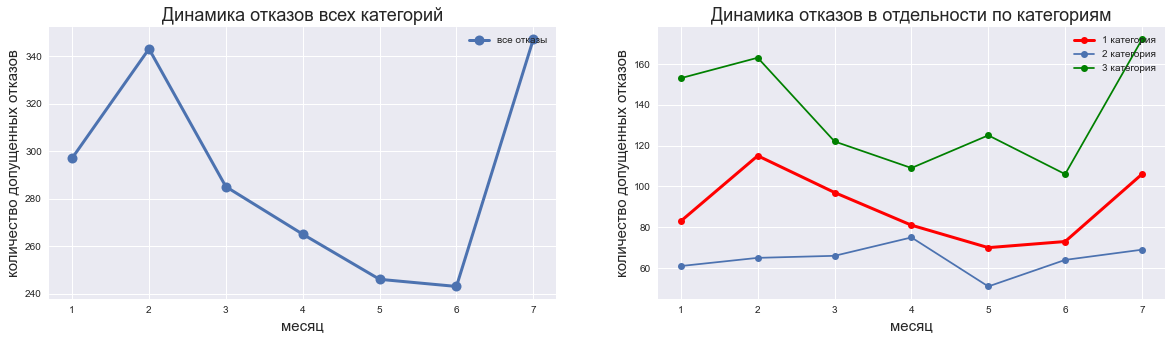

In [32]:
plt.style.use('seaborn-notebook')
fig, axes = plt.subplots(1,2, figsize=(20,5))
df['mounth'].value_counts().sort_index().plot.line(ax=axes[0], label = 'все отказы', linewidth = 3, marker='o',markersize = 10)
df[df['категория_отказа']=='1 категория']['mounth'].value_counts().sort_index().plot.line(color = 'red',ax=axes[1],linewidth = 3, label = '1 категория',marker='o',markersize = 7)
df[df['категория_отказа']=='2 категория']['mounth'].value_counts().sort_index().plot.line(ax=axes[1], label = '2 категория',marker='o',markersize = 7)
df[df['категория_отказа']=='3 категория']['mounth'].value_counts().sort_index().plot.line(ax=axes[1], color = 'green', label = '3 категория',marker='o',markersize = 7)

axes[0].set_title('Динамика отказов всех категорий', fontsize=18)
axes[1].set_title('Динамика отказов в отдельности по категориям', fontsize=18)
axes[0].set_xlabel('месяц', fontsize=15)
axes[0].set_ylabel('количество допущенных отказов', fontsize=15)
axes[1].set_xlabel('месяц', fontsize=15)
axes[1].set_ylabel('количество допущенных отказов', fontsize=15)

axes[0].legend(loc = 1)
axes[1].legend(loc = 1)
plt.show()

In [33]:
# plt.xlabel('месяц', fontsize=10)
# plt.ylabel('количество допущенных отказов', fontsize=10)
# plt.title('Динамика отказов в отдельности по категориям', fontsize=15)
# df[df['категория_отказа']=='1 категория']['mounth'].value_counts().sort_index().plot.line(figsize=(15, 4), color = 'red')
# df[df['категория_отказа']=='2 категория']['mounth'].value_counts().sort_index().plot.line(figsize=(15, 4))
# df[df['категория_отказа']=='3 категория']['mounth'].value_counts().sort_index().plot.line(figsize=(15, 4), color = 'green')

In [34]:
df.groupby('категория_отказа')['продолжительность'].median()

категория_отказа
1 категория    93
2 категория    26
3 категория    14
Name: продолжительность, dtype: int64

In [35]:
df_per = df['перегон'].value_counts().head()
ychastki = []
s = 0
for i in df_per:
    ychastki.append(df_per.index[s])
    s +=1

print(ychastki[0])
len(df[df['перегон']==ychastki[1]])

БАБАЕВО


139

In [36]:
print(f"При рассмотрении отказов по участкам (перегонам), то наибольшее количество было допущено на участке {ychastki[0]} - {len(df[df['перегон']==ychastki[1]])} отказа(ов)")
print("На графике ниже показано количество допущенных отказов по участкам")


При рассмотрении отказов по участкам (перегонам), то наибольшее количество было допущено на участке БАБАЕВО - 139 отказа(ов)
На графике ниже показано количество допущенных отказов по участкам


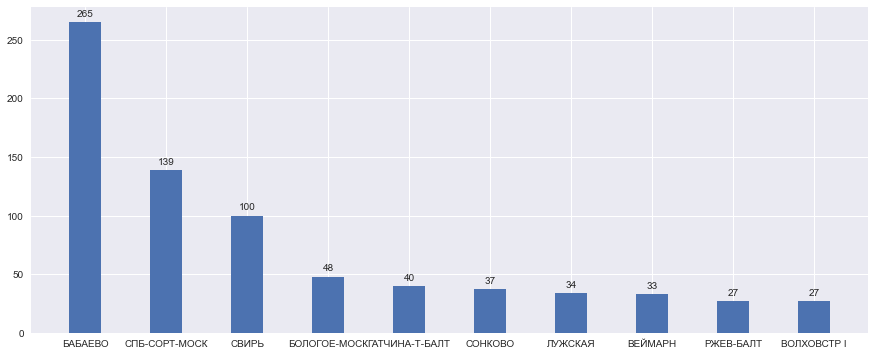

In [37]:
# df.groupby(['перегон']).size()cascending = False).head().plot(kind='bar',rot=45, alpha = 0.9)
# plt.ylabel('количество допущенных отказов', fontsize=12)
# plt.show()

# for i in data_q1.index:
#     ax.annotate(f"{data_q1[i]}", 
#                    xy=(i, data_q1[i] + 100),
#                    va = 'center', ha='center'
#                    )
fig, ax = plt.subplots(figsize=(15, 6))
data_q1 = df['перегон'].value_counts().head(10)
ax.bar(data_q1.index, data_q1,width=0.4
             )

for i in data_q1.index:
    ax.annotate(f"{data_q1[i]}", 
                xy=(i, data_q1[i] + 7),
                va = 'center', ha='center'
               )

# fig, ax = plt.subplots(1,1, figsize=(15, 6))
# data_q1 = data['Q1'].value_counts().sort_index()
# ax.bar(data_q1.index, data_q1, width=0.55)

# for i in data_q1.index:
#     ax.annotate(f"{data_q1[i]}", 
#                    xy=(i, data_q1[i] + 100),
#                    va = 'center', ha='center'
#                    )

In [38]:
print(f"Так же необходимо отметить, что наибольшее количество отказов допущено в грузовом движении")
print("На графике ниже показано количество допущенных отказов по виду движения")

Так же необходимо отметить, что наибольшее количество отказов допущено в грузовом движении
На графике ниже показано количество допущенных отказов по виду движения


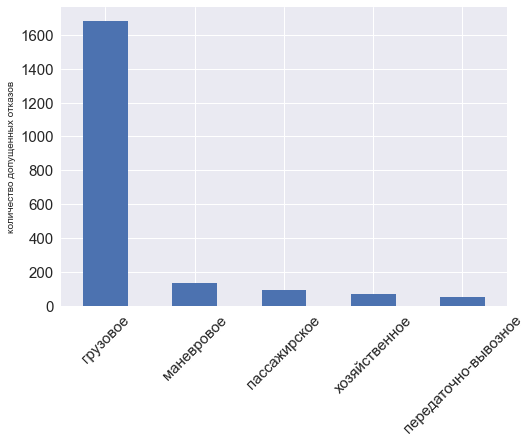

In [39]:
# fig, axes = plt.subplots(figsize=(8,5))
df['вид_следования_отказавшего_локомотива'].value_counts().plot.bar(fontsize=15, rot=45)
plt.ylabel('количество допущенных отказов', fontsize=10);

### по электровозному парку

In [40]:
df_el = df[df['el tep']=='электровозы']

In [41]:
df_el['серия_отказавшего_локомотива'].value_counts()

3ЭС4К    255
2ЭС4К    253
ВЛ10У    252
ВЛ10     150
2ЭС5К     71
ВЛ15      57
ЭП2К      31
3ЭС5К     24
ЭП1       17
ВЛ15С     16
2ЭС7      15
2ЭС6       6
ЧС2Т       5
ЧС200      1
Name: серия_отказавшего_локомотива, dtype: int64

In [42]:
df_el_ser = df_el['серия_отказавшего_локомотива'].value_counts().head()
seria_el = []
s = 0
for i in df_el_ser:
    seria_el.append(df_el_ser.index[s])
    s +=1

print(seria_el[0])
len(df[df['серия_отказавшего_локомотива']==seria_el[0]])

3ЭС4К


255

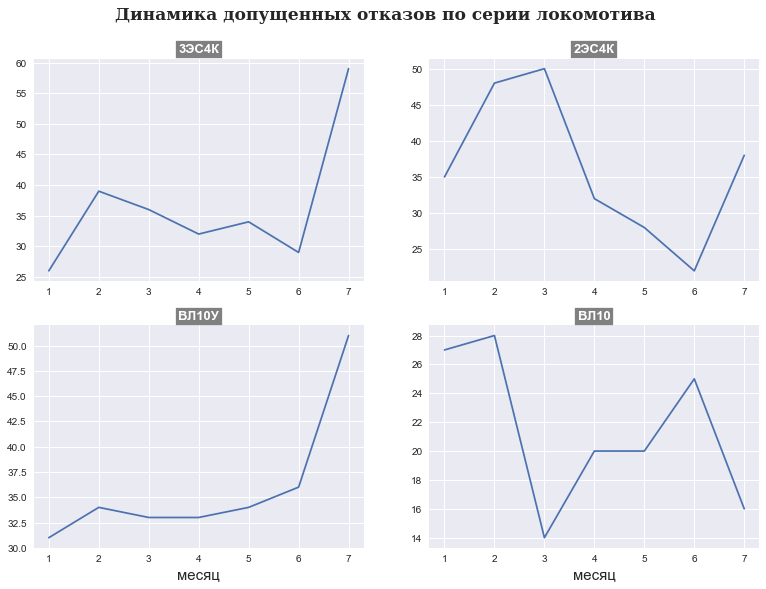

In [43]:

fig, axes = plt.subplots(2,2, figsize=(13,9))
df[df['серия_отказавшего_локомотива']==seria_el[0]]['mounth'].value_counts().sort_index().plot.line(ax=axes[0][0])
df[df['серия_отказавшего_локомотива']==seria_el[1]]['mounth'].value_counts().sort_index().plot.line(ax=axes[0][1])
df[df['серия_отказавшего_локомотива']==seria_el[2]]['mounth'].value_counts().sort_index().plot.line(ax=axes[1][0])
df[df['серия_отказавшего_локомотива']==seria_el[3]]['mounth'].value_counts().sort_index().plot.line(ax=axes[1][1])
fig.suptitle('Динамика допущенных отказов по серии локомотива', fontsize=17, fontweight='bold', fontfamily='serif', y=0.96)

axes[0][0].set_title(seria_el[0], fontsize=20, backgroundcolor='gray',
                                size=13, color='white', weight='bold')
axes[0][1].set_title(seria_el[1], fontsize=20, backgroundcolor='gray',
                                size=13, color='white', weight='bold')

axes[1][0].set_title(seria_el[2], fontsize=20, backgroundcolor='gray',
                                size=13, color='white', weight='bold')
axes[1][1].set_title(seria_el[3], fontsize=20, backgroundcolor='gray',
                                size=13, color='white', weight='bold')
axes[1][0].set_xlabel('месяц', fontsize=15)
axes[1][1].set_xlabel('месяц', fontsize=15);

In [44]:
print(f"При рассмотрении отказов по электровозному парку по сериям локомотивов, то наибольшее количество было допущено по серии {seria_el[0]} - {len(df[df['серия_отказавшего_локомотива']==seria_el[0]])} отказа(ов), по серии {seria_el[1]} - {len(df[df['серия_отказавшего_локомотива']==seria_el[1]])} отказа(ов), по серии {seria_el[2]} - {len(df[df['серия_отказавшего_локомотива']==seria_el[2]])} отказа(ов), по серии {seria_el[3]} - {len(df[df['серия_отказавшего_локомотива']==seria_el[3]])} отказа(ов),по серии {seria_el[4]} - {len(df[df['серия_отказавшего_локомотива']==seria_el[4]])} отказа(ов)")
print("На графике ниже показано распределение отказов по электровозному парку по серии локомотивов")


При рассмотрении отказов по электровозному парку по сериям локомотивов, то наибольшее количество было допущено по серии 3ЭС4К - 255 отказа(ов), по серии 2ЭС4К - 253 отказа(ов), по серии ВЛ10У - 252 отказа(ов), по серии ВЛ10 - 150 отказа(ов),по серии 2ЭС5К - 71 отказа(ов)
На графике ниже показано распределение отказов по электровозному парку по серии локомотивов


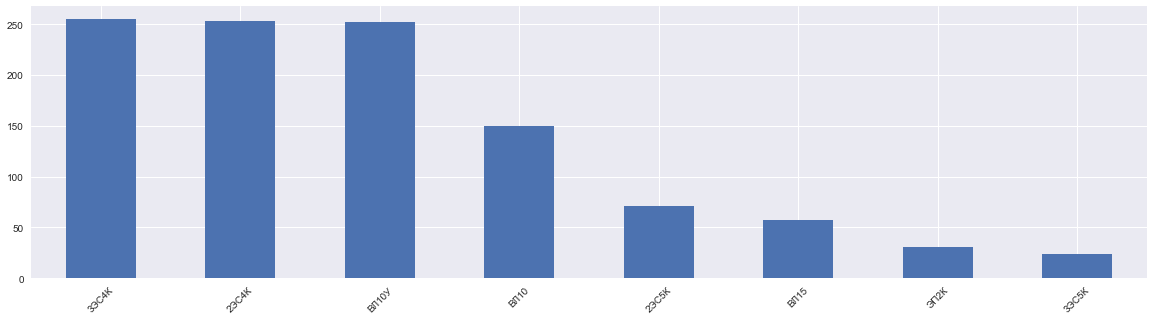

In [45]:
df_el['серия_отказавшего_локомотива'].value_counts().head(8).plot(kind="bar",figsize=(20,5), rot=45);

In [46]:
df_el_oborudovanie = df_el['отс_1_уровня'].value_counts().head()
oborud_el = []
s = 0
for i in df_el_oborudovanie:
    oborud_el.append(df_el_oborudovanie.index[s])
    s +=1

print(oborud_el)
len(df[df['отс_1_уровня']==oborud_el[0]])

['Электрооборудование силовой цепи  вспомогательных цепей и цепей управления локомотива  МВПС', 'Тормозное и пневматическое оборудование локомотива  МВПС', 'Системы автоматического управления режимами тяги и торможения  электронное оборудование локомотива', 'Тяговые электрические машины локомотива  МВПС', 'Экипажная часть и механическое оборудование локомотива  МВПС']


781

In [47]:
print(f"По виду оборудования отказы по электровозному парку распределились следующим образом:") 
print(f"По группе оборудования наибольшее количество отказов было допущено по {oborud_el[0]} - {len(df[df['отс_1_уровня']==oborud_el[0]])} отказа(ов), по оборудованию {oborud_el[1]} - {len(df[df['отс_1_уровня']==oborud_el[1]])} отказа(ов), по оборудованию {oborud_el[2]} - {len(df[df['отс_1_уровня']==oborud_el[2]])} отказа(ов), по оборудованию {oborud_el[3]} - {len(df[df['отс_1_уровня']==oborud_el[3]])} отказа(ов), по оборудованию {oborud_el[4]} - {len(df[df['отс_1_уровня']==oborud_el[4]])} отказа(ов)")
print("На графике ниже показано распределение отказов по электровозному парку по серии локомотивов")


По виду оборудования отказы по электровозному парку распределились следующим образом:
По группе оборудования наибольшее количество отказов было допущено по Электрооборудование силовой цепи  вспомогательных цепей и цепей управления локомотива  МВПС - 781 отказа(ов), по оборудованию Тормозное и пневматическое оборудование локомотива  МВПС - 340 отказа(ов), по оборудованию Системы автоматического управления режимами тяги и торможения  электронное оборудование локомотива - 150 отказа(ов), по оборудованию Тяговые электрические машины локомотива  МВПС - 153 отказа(ов), по оборудованию Экипажная часть и механическое оборудование локомотива  МВПС - 132 отказа(ов)
На графике ниже показано распределение отказов по электровозному парку по серии локомотивов


In [48]:
df['отс_1_уровня'].unique()

array(['Тяговые электрические машины локомотива  МВПС',
       'Вспомогательные электрические машины локомотива  МВПС',
       'Электрооборудование силовой цепи  вспомогательных цепей и цепей управления локомотива  МВПС',
       'Дизель и дизельное оборудование локомотива  МВПС',
       'Приборы безопасности и радиосвязь локомотива  МВПС',
       'Экипажная часть и механическое оборудование локомотива  МВПС',
       'Тормозное и пневматическое оборудование локомотива  МВПС',
       'Системы автоматического управления режимами тяги и торможения  электронное оборудование локомотива',
       'Система вентиляции локомотива'], dtype=object)

In [49]:
df_otc_1 = {
    'Тяговые электрические машины локомотива  МВПС':"тяг-ые элек-ие машины",
    'Вспомогательные электрические машины локомотива  МВПС':"вспом. элек-ие машины",
    'Электрооборудование силовой цепи  вспомогательных цепей и цепей управления локомотива  МВПС':"электрооборудование",
    'Дизель и дизельное оборудование локомотива  МВПС':"дизель и диз-ое обор-ие",
    'Приборы безопасности и радиосвязь локомотива  МВПС':"приборы без-ти",
    'Экипажная часть и механическое оборудование локомотива  МВПС':'экипажная и механическая части',
    'Тормозное и пневматическое оборудование локомотива  МВПС':"тормозное обор-ие",
    'Системы автоматического управления режимами тяги и торможения  электронное оборудование локомотива':"САУТ",
    'Система вентиляции локомотива':"система вентиляции"
    }

In [50]:
df['otc'] = df['отс_1_уровня'].map(df_otc_1)

In [51]:
df_el = df[df['el tep']=='электровозы']

электрооборудование               524
тормозное обор-ие                 278
САУТ                               89
тяг-ые элек-ие машины              86
экипажная и механическая части     71
Name: otc, dtype: int64

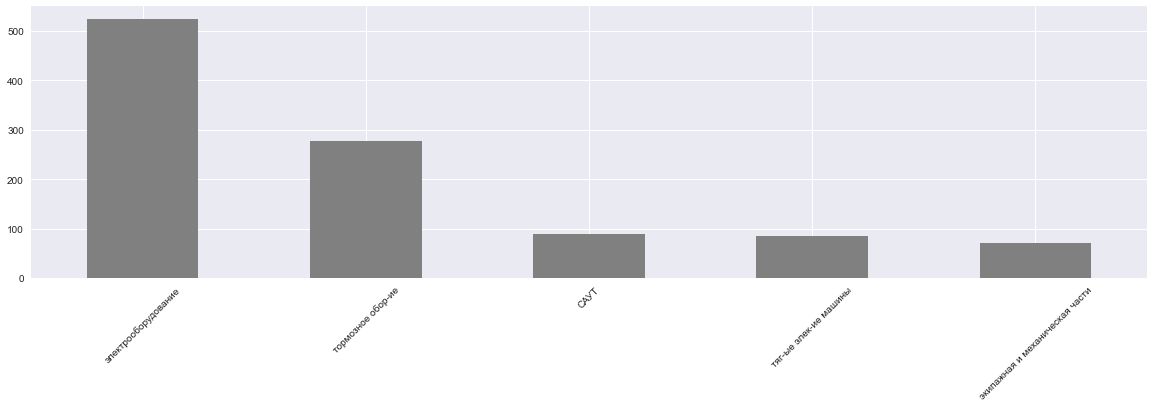

In [52]:
df_el['otc'].value_counts().head().plot(kind="bar",figsize=(20,5), color="gray", rot=45);
df_el['otc'].value_counts().head(5)

In [53]:
df.columns

Index(['статус_оповещения', 'перегон', 'продолжительность',
       'признак_вины_сторонней_организации',
       'признак_вины_сервисной_организации', 'серия_отказавшего_локомотива',
       'бортовой_номер_отказавшего_локомотива', 'категория_отказа',
       'отс_1_уровня', 'отс_3_уровня', 'начало_отказа', 'группа_причин',
       'отс_2_уровня', 'вид_следования_отказавшего_локомотива', 'теп_/_эле',
       'месяц', 'дат', 'ден', 'дата', 'mounth', 'month_mes', 'el tep', 'otc'],
      dtype='object')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2026 entries, 0 to 2063
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   статус_оповещения                      2026 non-null   object        
 1   перегон                                2026 non-null   object        
 2   продолжительность                      2026 non-null   int64         
 3   признак_вины_сторонней_организации     2026 non-null   object        
 4   признак_вины_сервисной_организации     2026 non-null   object        
 5   серия_отказавшего_локомотива           2026 non-null   object        
 6   бортовой_номер_отказавшего_локомотива  2026 non-null   float64       
 7   категория_отказа                       2026 non-null   object        
 8   отс_1_уровня                           2026 non-null   object        
 9   отс_3_уровня                           2026 non-null   object  

In [55]:
df_num = df[['продолжительность', 'месяц','mounth']]

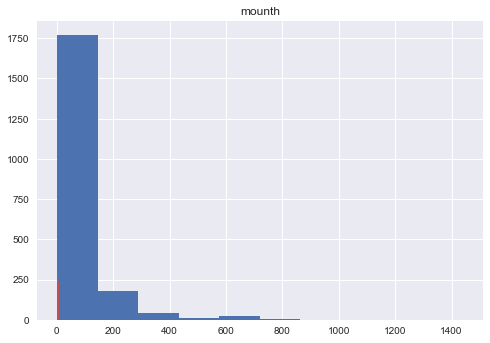

In [56]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show

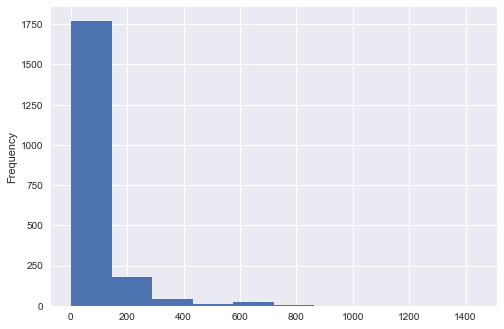

In [57]:
# for i in df_num:
df_num['продолжительность'].plot.hist();

                                       продолжительность  \
продолжительность                               1.000000   
бортовой_номер_отказавшего_локомотива           0.216632   
месяц                                           0.034620   
ден                                            -0.011107   
mounth                                          0.034620   

                                       бортовой_номер_отказавшего_локомотива  \
продолжительность                                                   0.216632   
бортовой_номер_отказавшего_локомотива                               1.000000   
месяц                                                               0.043755   
ден                                                                -0.041590   
mounth                                                              0.043755   

                                          месяц       ден    mounth  
продолжительность                      0.034620 -0.011107  0.034620  
бортовой_номер_отк

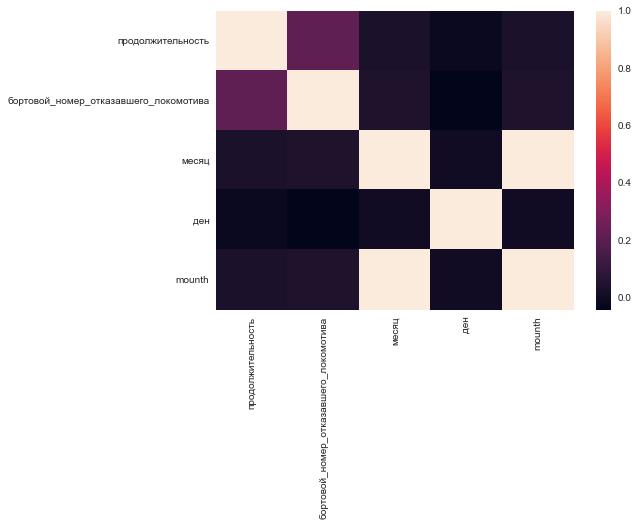

In [58]:
print(df.corr())
sns.heatmap(df.corr());

In [59]:
pd.pivot_table(df, index = 'месяц', values = ['продолжительность',
       'дата'], aggfunc=np.median)

,продолжительность
месяц,
1,17
2,34
3,26
4,29
5,30
6,33
7,23


In [60]:
df.describe()

,продолжительность,бортовой_номер_отказавшего_локомотива,месяц,ден,mounth
count,2026.000000,2026.000000,2026.000000,2026.000000,2026.000000
mean,70.298618,766.127838,3.956071,15.926456,3.956071
std,111.672816,1354.386846,2.068827,8.364417,2.068827
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,14.000000,47.000000,2.000000,9.000000,2.000000
50%,28.000000,295.500000,4.000000,16.000000,4.000000
75%,80.000000,923.500000,6.000000,23.000000,6.000000
max,1440.000000,9106.000000,7.000000,31.000000,7.000000


In [61]:
x = df['начало_отказа']
y = df['продолжительность']
plot.hist()

NameError: name 'plot' is not defined

In [ ]:
plt.plot();